In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from apify_client import ApifyClient
import networkx as nx

In [84]:
df = pd.read_json('results1.json')

## Montando a rede

In [85]:
nomes_usuarios = []

for it in df['latestComments'].items():
    for comments in it[1]:
        print(comments['ownerUsername'])
        nomes_usuarios.append(comments['ownerUsername'])

mivkzx
tr_mariafernanda
lucascajazeiro
dudastarlingmed
neiamarquesdivi
julianawalsh563
debora_fagundesd
anna_luisa_araujo_
anna_luisa_araujo_
rezende_uai
lidi_paulina_
gio_garbaccio
lcssoares
eliane.costa.7796
davi_cb07
freitasvaa
joao_h_e
pedroo.tavares
jamppss
lapalms44
lapalms44
julio.cancado
andrelamouniertv
baldoniandre
luiz_henrique_noronha
dalvaoooo
o_anacarolina
elaine_j0
laurabretasm


In [86]:
arestas = []
for usuario in nomes_usuarios: 
    arestas.append((usuario, 'ufsjbr'))

In [87]:
grafo = nx.DiGraph()
grafo.add_edges_from(arestas)

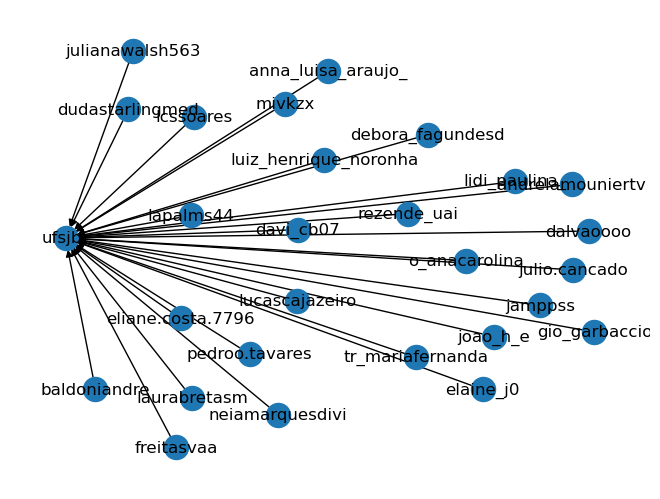

In [88]:
nx.draw(grafo, with_labels=True)
plt.savefig('grafoInicial.png')

In [95]:
nx.write_network_text(grafo, path = 'grafo.txt')
nx.write_gml(grafo, path = 'grafo.gml')

## Análise dos locais

In [89]:
import geopandas as gpd
from geopy.geocoders import Nominatim  
from shapely.geometry import Point, Polygon
import contextily as cx

In [90]:
crs={'init':'epsg:4674'}

In [91]:
nome_locais = list(df['locationName'].dropna())

geolocator = Nominatim(user_agent='myapplication')

coords = [(geolocator.geocode(local).latitude, geolocator.geocode(local).longitude) for local in nome_locais]

geometry=[Point(y, x) for x,y in coords]

gdf_locaisUFSJ = gpd.GeoDataFrame(columns = ['nome'], crs = crs, geometry = geometry)

/home/rodrigo/.local/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [101]:
mg = gpd.read_file('MG/MG_Municipios_2021.shp')

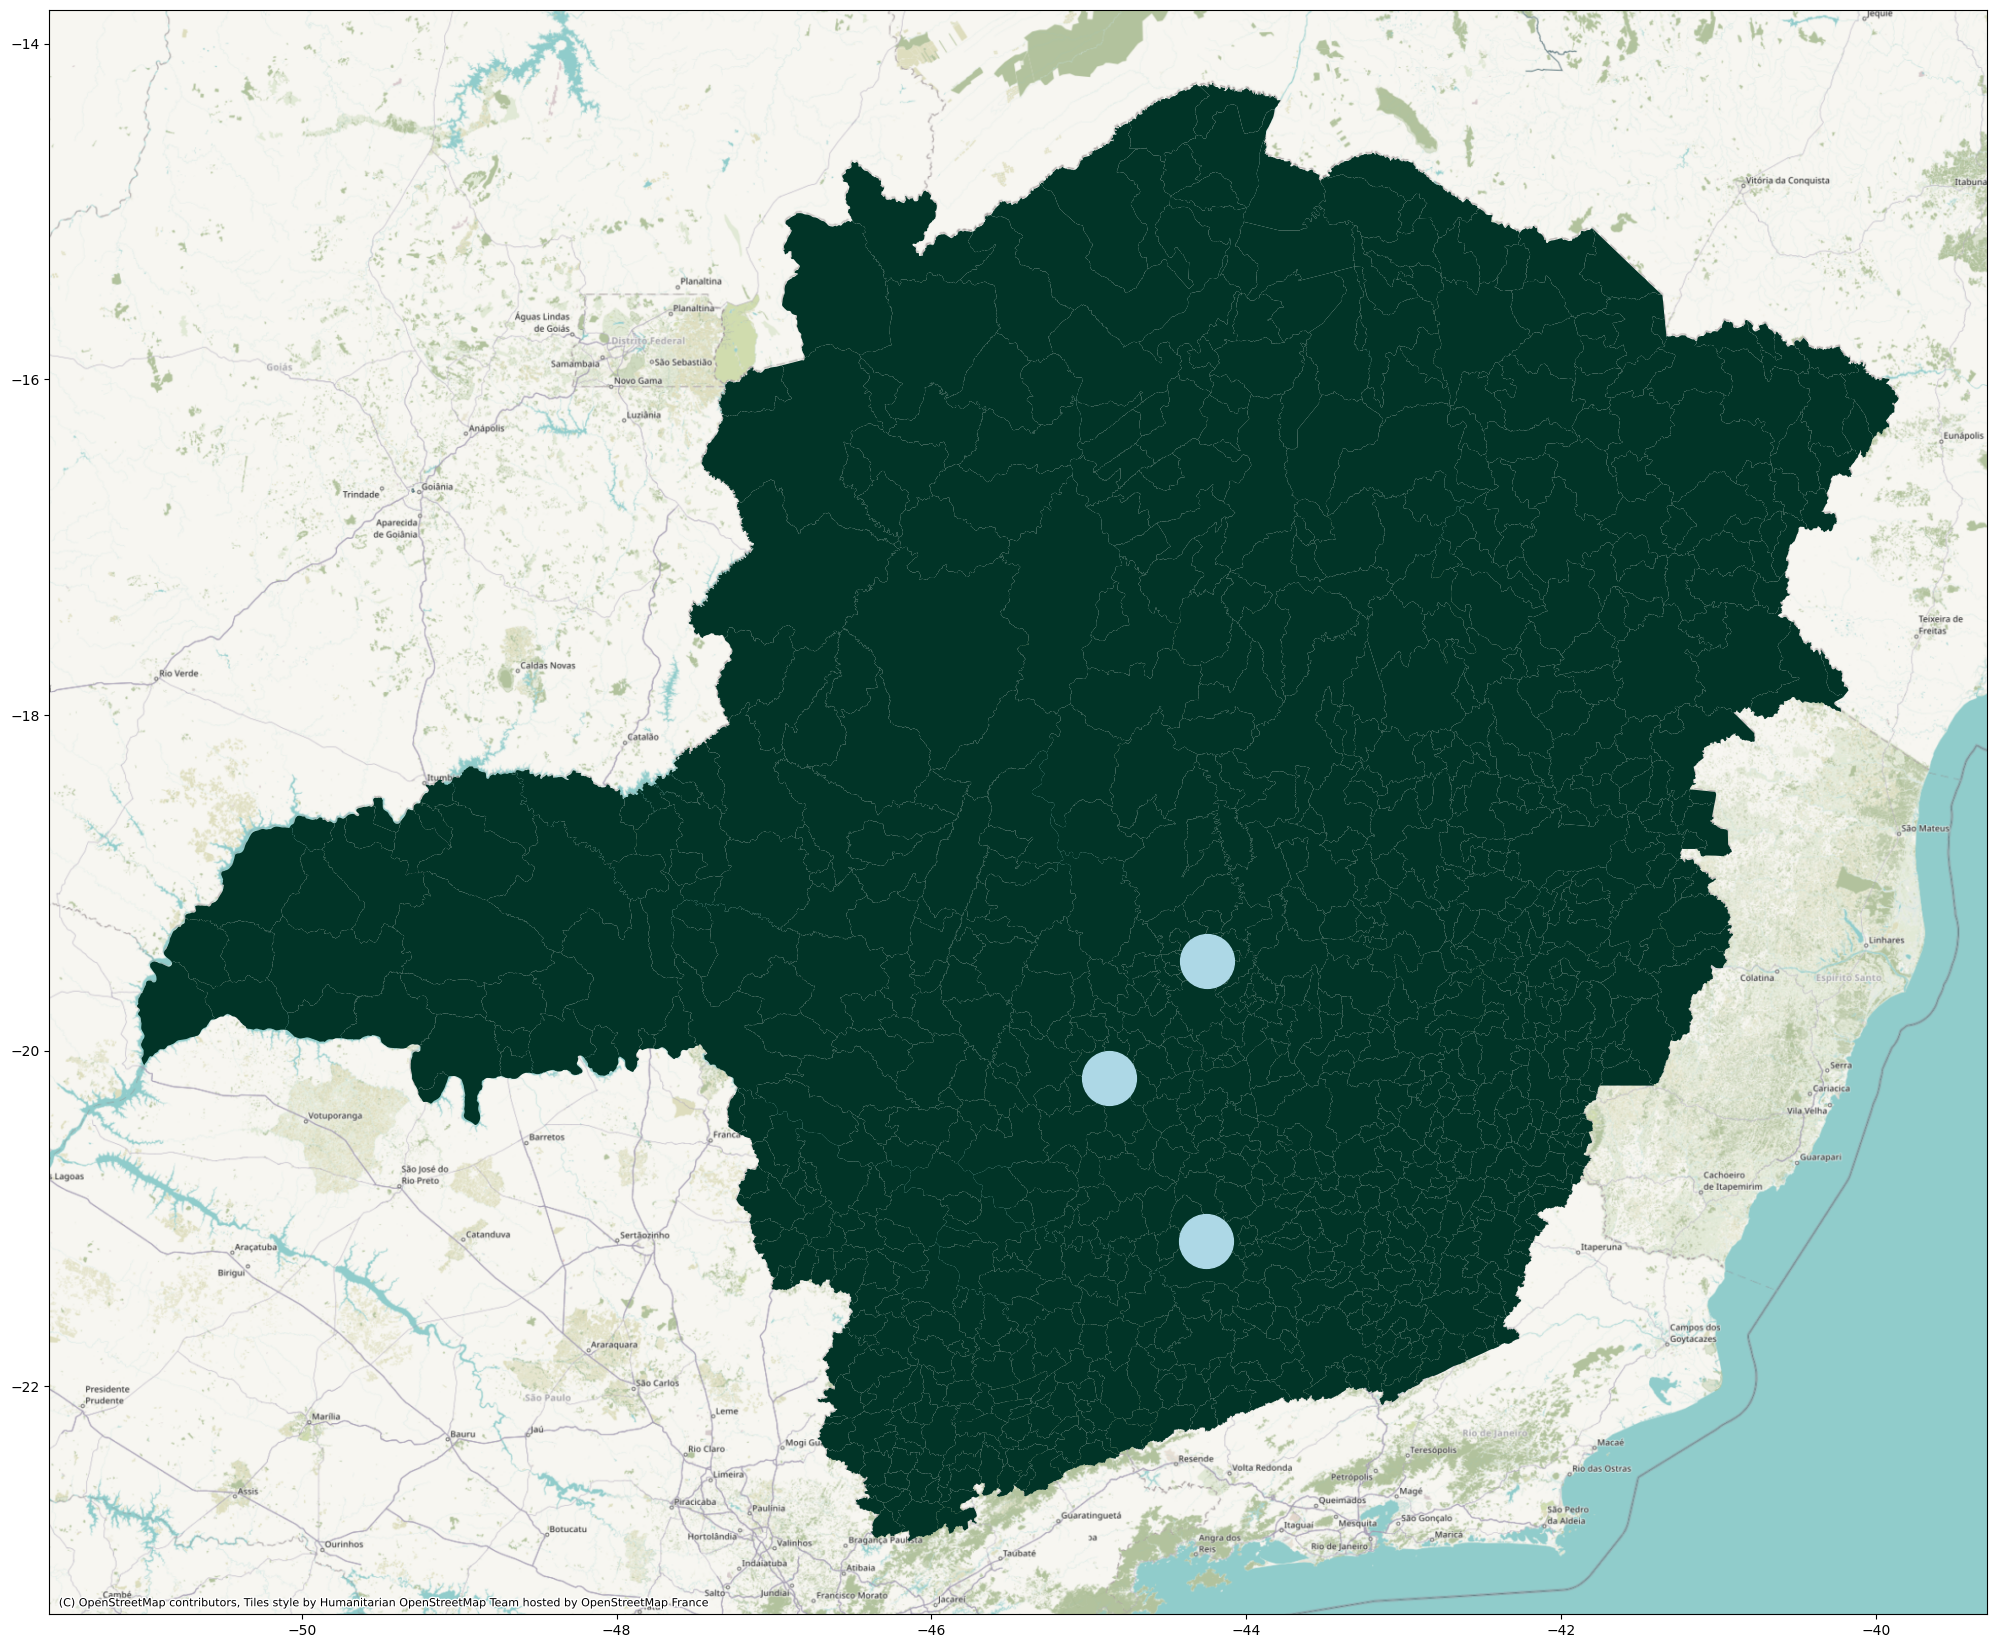

In [126]:
# Primeiro, cria a figura e o eixo
fig, ax = plt.subplots(figsize=(50/2, 50/2))  # ou (50, 50) se quiser mais controle

# Plota os polígonos primeiro (fundo)
mg.plot(ax=ax, color='#013427')
gdf_locaisUFSJ.plot(ax=ax, color='lightblue', markersize=1500)
cx.add_basemap(ax=ax, crs=gdf_locaisUFSJ.crs, zoom=8)

plt.savefig('mapa2.png')